# Get the data from kaggle

Install kaggle for collaboratory

In [1]:
!pip install kaggle

Now go and download the kaggle.json file from your account at kaggle.com. 
Then upload that file to colab

In [0]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"utkarshbhardwaj007","key":"73af6fe036a0076f9da932d7dfa6fa97"}'}

Make a directory and copy the file into it

In [0]:
! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/

Give the file permissions using chmod

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

Check that kaggle was successfully installed by listing its datasets.

In [7]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
divyansh22/us-border-crossing-data                          US Border Crossing Data                             2MB  2020-04-19 09:38:10            186  
baltacifatih/turkish-lira-banknote-dataset                  Turkish Lira Banknote Dataset                       3GB  2020-04-19 14:48:39             19  
doaaalsenani/usa-cers-dataset                               US Cars Dataset                                    66KB  2020-04-22 14:38:05            243  
justinas/housing-in-london                                  Housing in London                                 162KB  2020-04-25 15:08:06            141  
steveahn/memory-test-on-drugged-islanders-data              Memory Test on D

Download our required dataset (fruits-360) from kaggle.

In [8]:
! kaggle datasets download -d moltean/fruits

 99% 724M/732M [00:08<00:00, 89.6MB/s]
100% 732M/732M [00:08<00:00, 89.8MB/s]


Make a directory where we will work.

In [0]:
! mkdir MMOODDEELL

Unzip the downloaded dataset into this directory.

In [10]:
!unzip fruits.zip -d MMOODDEELL/

Streaming output truncated to the last 5000 lines.
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_16_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_17_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_181_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_182_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_183_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_184_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_185_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_186_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_187_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_188_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_189_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_18_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_190_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tangelo/r_191_100.jpg  


# Make the model

Import all necessary libraries and also the VGG model.

Using TensorFlow backend.


58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 20618 images belonging to 120 classes.
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Dates': 35, 'Eggplant': 36, 'Ginger Root': 37, 'Granadilla': 38, 'Grape Blue': 39, 'Grape Pink': 40, 'Grape White': 41, 'Grape White 2': 42, 'Grape White 3': 43, 'Grape White 4': 44, 'Grapefruit Pink': 45, 'Grapefruit White': 46, 'Guava': 47, 'Hazelnut': 

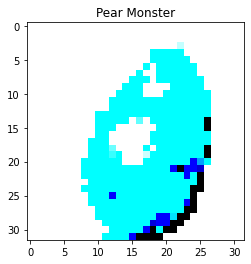

Found 60486 images belonging to 120 classes.
Found 20618 images belonging to 120 classes.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report

from glob import glob

# re-size all the images to this
IMAGE_SIZE = [32, 32] # feel free to change depending on dataset

# training config:
epochs = 5
batch_size = 32

# https://www.kaggle.com/paultimothymooney/blood-cells
# train_path = '../large_files/blood_cell_images/TRAIN'
# valid_path = '../large_files/blood_cell_images/TEST'


train_path = '/content/MMOODDEELL/fruits-360/Training'
valid_path = '/content/MMOODDEELL/fruits-360/Test'

# useful for getting number of files
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

# useful for getting number of classes
folders = glob(train_path + '/*')


# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape = (32,32,3), weights='imagenet', include_top=False)

print(vgg.summary())

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

# our layers
x = Flatten()(vgg.output)
x = Dense(1300, activation='relu')(x)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)


# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

# get label mapping for confusion matrix plot later
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k


# should be a strangely colored image (due to VGG weights being BGR)
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break


# create generators
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

# Fit the model

In [12]:
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)

Epoch 1/5
1890/1890 [==============================] - 108s 57ms/step - loss: 1.8857 - accuracy: 0.7556 - val_loss: 0.7505 - val_accuracy: 0.7778
Epoch 2/5
1890/1890 [==============================] - 101s 54ms/step - loss: 0.6912 - accuracy: 0.8682 - val_loss: 2.1040 - val_accuracy: 0.8088
Epoch 3/5
1890/1890 [==============================] - 103s 54ms/step - loss: 0.6325 - accuracy: 0.8912 - val_loss: 2.2276 - val_accuracy: 0.8326
Epoch 4/5
1890/1890 [==============================] - 102s 54ms/step - loss: 0.5842 - accuracy: 0.9052 - val_loss: 2.9231 - val_accuracy: 0.8406
Epoch 5/5
1890/1890 [==============================] - 102s 54ms/step - loss: 0.6057 - accuracy: 0.9107 - val_loss: 1.0354 - val_accuracy: 0.8473


Define a function to make the confusion matrix

In [0]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order for both predictions and targets
  
  print("Generating confusion matrix", N)
  predictions = []
  targets = []

  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break
  cm = confusion_matrix(targets, predictions)
  return predictions, targets, cm

Call the function and print the confusion matrix.

In [14]:
predictions = []
targets = []

predictions, targets, cm = get_confusion_matrix(train_path, len(image_files))
print(cm)
valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
print(valid_cm)

Generating confusion matrix 60486
Found 60486 images belonging to 120 classes.
[[221   0   0 ...   1   0   0]
 [  5 260   0 ...   1   0   0]
 [  0   0 459 ...   0   0   0]
 ...
 [  0   0   0 ... 352   0   0]
 [  0   0   0 ...   0 441   0]
 [  0   0   0 ...   0   0 725]]
Generating confusion matrix 20618
Found 20618 images belonging to 120 classes.
(array([  0.,   0.,   0., ..., 119., 119., 119.]), array([  0.,   0.,   0., ..., 119., 119., 119.]), array([[ 64,   0,   0, ...,   0,   0,   0],
       [ 14,  32,   0, ...,   1,   0,   0],
       [  0,   0,  89, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 113,   0,   0],
       [  0,   0,   0, ...,   0, 139,   0],
       [  0,   0,   0, ...,   0,   0, 245]]))


# Plot accuracy and loss graphs.

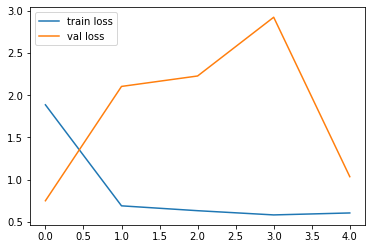

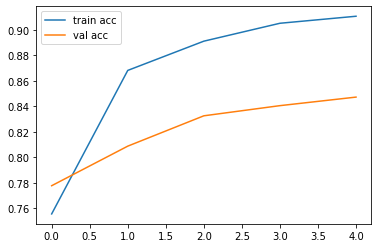

In [15]:
# plot some data

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Make a classification report

In [0]:
from sklearn.metrics import classification_report

Print the classification report (scroll to see the whole report)

In [17]:
print(classification_report(predictions, targets))

              precision    recall  f1-score   support

         0.0       0.45      0.78      0.57       282
         1.0       0.59      0.96      0.73       272
         2.0       0.96      0.91      0.93       503
         3.0       0.77      0.99      0.87       385
         4.0       0.92      0.66      0.77       669
         5.0       0.93      0.96      0.95       475
         6.0       0.72      0.72      0.72       454
         7.0       0.83      0.79      0.81       516
         8.0       0.90      0.74      0.81       600
         9.0       0.94      0.91      0.92       444
        10.0       0.97      0.86      0.91       554
        11.0       0.72      0.98      0.83       358
        12.0       0.93      0.97      0.95       644
        13.0       0.71      0.99      0.82       352
        14.0       0.96      0.98      0.97       419
        15.0       0.97      0.94      0.96       504
        16.0       0.98      0.98      0.98       493
        17.0       0.98    

# We have achieved an accuracy of 92% in a classification problem  with 120 classes! This shows us the power of VGG and transfer learning.

Finally let's save the model.

In [0]:
model.save('fruits365-92%-VGG.h5')